# Dependency Ratio

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
df = pd.read_csv("data/swedish_population_by_year_and_sex_1860-2022.csv")
df

,age,sex,1860,1861,1862,1863,1864,1865,1866,1867,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,0,men,60589,59797,62371,61515,61931,60998,63036,58645,...,58649,59584,59994,61005,59899,60032,59476,58485,58692,54095
1,0,women,58837,58136,60041,59384,60100,59622,60874,56586,...,55359,56296,55884,58018,56715,56807,55907,55104,55971,51091
2,1,men,56001,54544,52933,55776,57346,57776,57017,59071,...,59039,59489,60640,61352,62531,60973,60993,60058,59195,59411
3,1,women,54833,53762,52282,54500,55823,56641,56263,57539,...,55884,56083,57292,57216,59444,57789,57783,56533,55855,56712
4,2,men,52502,54062,51613,50710,53743,55227,55696,55254,...,58721,59807,60292,61817,62258,63361,61598,61348,60596,59723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,108,women,0,0,0,0,0,0,0,0,...,6,8,5,3,3,10,7,9,4,8
218,109,men,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
219,109,women,0,0,0,0,0,0,0,0,...,4,2,6,3,3,1,6,2,6,1
220,110+,men,0,0,0,0,0,0,0,0,...,1,1,1,1,0,3,0,0,0,0


In [77]:
df.describe()

,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,...,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,17386.162162,17623.864865,17826.581081,18070.504505,18291.918919,18508.846847,18721.824324,18891.126126,18892.121622,18828.959459,...,43445.333333,43907.004505,44373.950450,45023.211712,45586.675676,46081.914414,46520.671171,46753.581081,47082.549550,47394.396396
std,15645.403470,15839.298441,16001.893327,16206.160923,16420.421660,16585.922221,16784.191438,16916.504279,16795.995343,16636.004985,...,23925.183617,24100.434583,24284.013334,24590.958159,24838.714952,25029.843005,25155.082552,25190.251984,25235.572786,25302.509000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1151.500000,1227.750000,1236.750000,1277.500000,1258.500000,1255.750000,1249.500000,1181.250000,1368.250000,1271.750000,...,23423.750000,23503.500000,24530.250000,24218.000000,24466.000000,25000.500000,25636.500000,26880.500000,27366.000000,28946.250000
50%,13641.000000,14576.000000,14665.500000,14617.500000,14492.500000,14856.500000,15968.500000,16018.500000,17018.500000,17424.000000,...,55896.000000,56367.000000,56820.500000,57213.500000,57393.000000,57578.500000,57689.000000,57620.500000,57468.500000,57508.000000
75%,30140.000000,30429.000000,30371.000000,30739.000000,30680.250000,30936.000000,31234.750000,31301.500000,31130.500000,30608.000000,...,60710.750000,61194.500000,61421.500000,62341.750000,62943.250000,63559.000000,64155.250000,64231.250000,64387.500000,64586.000000
max,60589.000000,59797.000000,62371.000000,61515.000000,61931.000000,60998.000000,63036.000000,59071.000000,56706.000000,54322.000000,...,71269.000000,72659.000000,74108.000000,76198.000000,77718.000000,78928.000000,80028.000000,80578.000000,81453.000000,82506.000000


In [78]:
age_df = df.drop(columns='sex').groupby("age").sum()
age_df

,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
age,,,,,,,,,,,,,,,,,,,,,
0,119426,117933,122412,120899,122031,120620,123910,115231,100271,104595,...,114008,115880,115878,119023,116614,116839,115383,113589,114663,105186
1,110834,108306,105215,110276,113169,114417,113280,116610,106622,91732,...,114923,115572,117932,118568,121975,118762,118776,116591,115050,116123
10,78276,77778,74172,78904,86542,81133,81184,84869,93179,94269,...,107081,109902,111478,116954,119359,122606,124897,128647,124298,125743
100,0,0,0,0,0,0,0,0,0,0,...,801,852,740,881,907,854,954,1171,1156,1102
101,0,0,0,0,0,0,0,0,0,0,...,497,488,513,460,545,547,529,576,746,730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,627,627,626,0,0,0,0,0,0,0,...,5716,6108,7567,7369,6749,7006,7317,7135,7236,7263
96,0,0,0,0,0,0,0,0,0,0,...,4222,4238,4485,5544,5400,4983,5241,5361,5344,5413
97,0,0,0,0,0,0,0,0,0,0,...,2843,3027,3016,3170,3968,3873,3655,3710,3944,3811


In [79]:
age = pd.to_numeric(age_df.index.str.replace("+", ""))

In [80]:
children_df = age_df[age < 15]
children_sum = children_df.sum()
children_sum

1860    1292962
1861    1318714
1862    1338720
1863    1362024
1864    1380235
         ...   
2018    1819729
2019    1834821
2020    1837798
2021    1839103
2022    1829093
Length: 163, dtype: int64

In [81]:
elderly_df = age_df[age > 64]
elderly_sum = elderly_df.sum()
elderly_sum

1860     201645
1861     208106
1862     212807
1863     217661
1864     219574
         ...   
2018    2035711
2019    2065367
2020    2088086
2021    2118766
2022    2147137
Length: 163, dtype: int64

In [82]:
labor_df = age_df[(age >= 15) & (age <= 64)]
labor_sum = labor_df.sum()
labor_sum

1860    2365121
1861    2385678
1862    2405974
1863    2431967
1864    2460997
         ...   
2018    6374745
2019    6427401
2020    6453411
2021    6494457
2022    6545326
Length: 163, dtype: int64

In [83]:
dependent_sum = children_sum + elderly_sum
dependency_ratio = dependent_sum / labor_sum
dependency_ratio

1860    0.631937
1861    0.639994
1862    0.644864
1863    0.649550
1864    0.650065
          ...   
2018    0.604799
2019    0.606806
2020    0.608342
2021    0.609423
2022    0.607492
Length: 163, dtype: float64

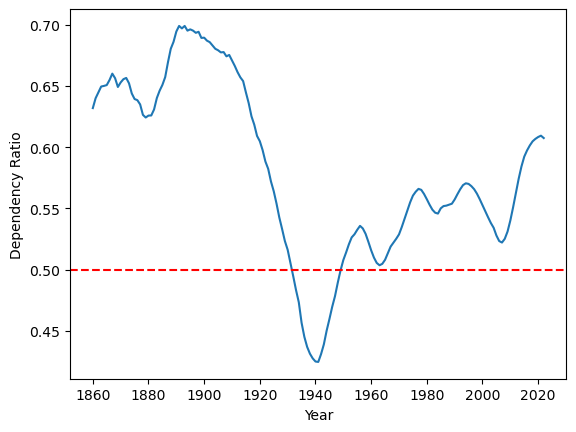

In [84]:
plt.plot(dependency_ratio)
plt.xlabel('Year')
plt.ylabel('Dependency Ratio')
plt.xticks(range(0, len(dependency_ratio), 20))
plt.axhline(y=.5, color='r', linestyle='--')

# Population Fractions

In [85]:
children_fraction = children_sum / dependent_sum
elderly_fraction = elderly_sum / dependent_sum

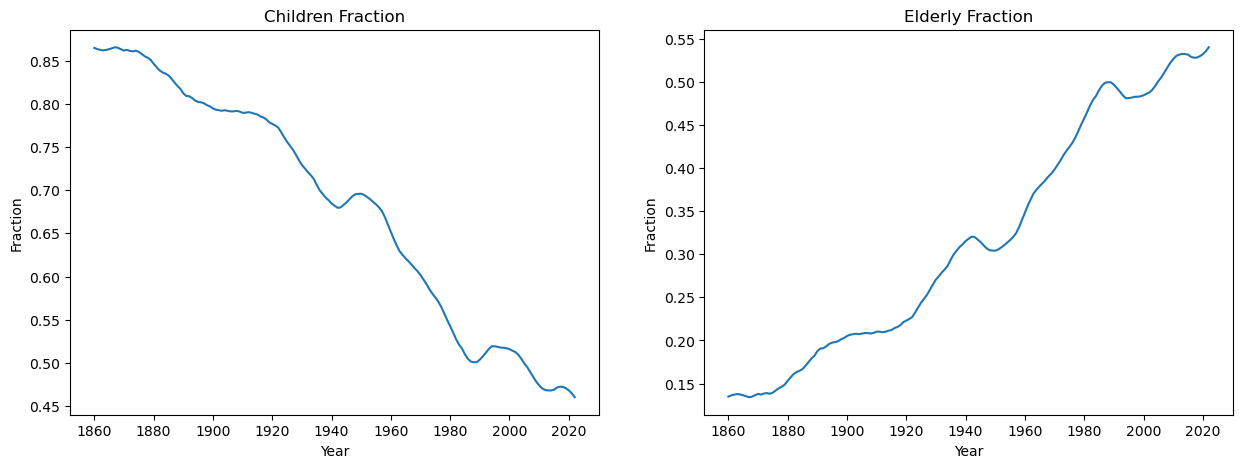

In [90]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(children_fraction)
ax[0].set_title('Children Fraction')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Fraction')
ax[0].set_xticks(range(0, len(children_fraction), 20))
ax[1].plot(elderly_fraction)
ax[1].set_title('Elderly Fraction')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Fraction')
ax[1].set_xticks(range(0, len(elderly_fraction), 20))
plt.show()